In [1]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

In [ ]:
# 一个常见的错误是人们可能在评估目标群体存活时间时会简单的忽略右侧截断
# 考虑一种情况，其中人口实际上由两个亚群组成， 𝐴 和 𝐵。人口𝐴 寿命非常短，例如平均2个月，
# 人口 𝐵 享有更长的使用寿命，例如平均12个月。我们事先不知道这种区别。假定我们的实验进行了十个月,
# 即在𝑡=10就结束了，我们希望调查整个人口的平均寿命。

In [2]:
N = 25

CURRENT_TIME = 10

In [3]:
#数据随机生成。指数分布
actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])

In [4]:
actual_lifetimes

array([ 1.14636301,  5.39294979,  1.20730844,  4.38613911,  1.03442802,
        4.33955411,  0.12864845, 11.58591629,  0.57138433,  0.12852386,
       27.36852053,  0.84849611,  0.6234064 ,  6.59139457,  4.35605082,
       23.20525065,  5.55210448,  1.29640354,  5.65181173, 14.17469019,
        0.94028835,  1.37181871, 17.2819816 ,  0.61833632,  0.12007204])

In [5]:
#数据右侧截断，大于10个月的数据归类成10。
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
observed_lifetimes

array([ 1.14636301,  5.39294979,  1.20730844,  4.38613911,  1.03442802,
        4.33955411,  0.12864845, 10.        ,  0.57138433,  0.12852386,
       10.        ,  0.84849611,  0.6234064 ,  6.59139457,  4.35605082,
       10.        ,  5.55210448,  1.29640354,  5.65181173, 10.        ,
        0.94028835,  1.37181871, 10.        ,  0.61833632,  0.12007204])

In [6]:
#数据是否死亡观察数据集
death_observed = actual_lifetimes < CURRENT_TIME
death_observed

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True])

Observed lifetimes at time 10:
 [ 1.14636301  5.39294979  1.20730844  4.38613911  1.03442802  4.33955411
  0.12864845 10.          0.57138433  0.12852386 10.          0.84849611
  0.6234064   6.59139457  4.35605082 10.          5.55210448  1.29640354
  5.65181173 10.          0.94028835  1.37181871 10.          0.61833632
  0.12007204]


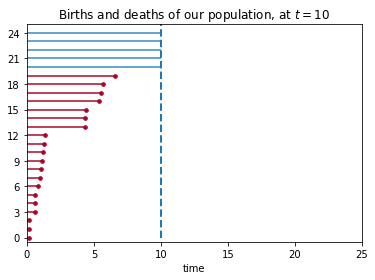

In [7]:
ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)
ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

(0.0, 25.0)

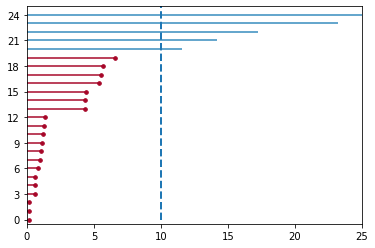

In [8]:
#数据没有过滤，真实的情况，生存分析最初被设计出来的目的就是为了处理存在右侧截断的这种数据的。
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

In [ ]:
# 如果我们不删除发生右侧截断的样本而直接求平均值，仍然会低估这个群体的平均生存时间，
# 要注意的是，我们只能观测到10时刻之前的事情，10时刻之后的我们并不能看到。